In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from funcs import *

class AdaGrad(object):
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h == None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= ( self.lr * grads[key] ) / (np.sqrt(self.h[key]) + 1e-7) # 1e-7是为了防止溢出

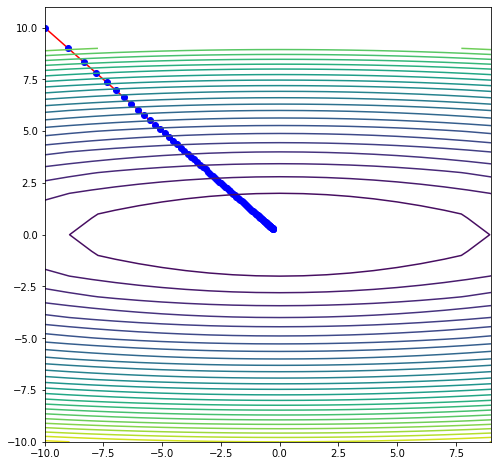

In [2]:
def f(X):
    return (1/20) * X[0]**2 + X[1]**2

# AddGrad 相当于把在y轴上梯度下降的速度变慢了，变成和在x轴上下降差不多的数量级
# 因为梯度下降的慢，可以提高学习率
learning_rate = 1 
optimizer = AdaGrad(learning_rate)

# 梯度下降地更新速度
update_times = 100

x = np.array([-10.0, 10.0])
params = {}
params['X'] = x

# 存放坐标的列表
x_list=[]
y_list=[]
    # 存放初始坐标
x_list.append(x[0])
y_list.append(x[1])

grads = {}
for i in range(update_times):
    grads['X'] = numerical_gradient(f, params['X'])
    optimizer.update(params, grads)
    x_list.append(x[0])
    y_list.append(x[1])
    

# 绘图配置
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

# 等高线数据
x = np.arange(-10,10,1)
y = x.copy()
x,y = np.meshgrid(x,y)
X = np.array([x,y])
z = f(X)

    # 梯度图
ax.plot(x_list, y_list,'r-')
ax.plot(x_list, y_list,'bo')

    # 等高线图
ax.contour(X[0],X[1],z, levels=30)